In [8]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
db = sqlite3.connect('claims.db')


In [29]:
denominator = pd.read_sql_query('''SELECT doctor_id, COUNT(*) AS denominator
FROM medical_headers 

Where ('211.4' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25)              
OR '211.3' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25))
AND D1 NOT LIKE'152.%'
AND D2 NOT LIKE'152.%'
AND D3 NOT LIKE'152.%'
AND D4 NOT LIKE'152.%'
AND D5 NOT LIKE'152.%'
AND D6 NOT LIKE'152.%'
AND D7 NOT LIKE'152.%'
AND D8 NOT LIKE'152.%'
AND D9 NOT LIKE'152.%'
AND D10 NOT LIKE'152.%'
AND D11 NOT LIKE'152.%'
AND D12 NOT LIKE'152.%'
AND D13 NOT LIKE'152.%'
AND D14 NOT LIKE'152.%'
AND D15 NOT LIKE'152.%'
AND D16 NOT LIKE'152.%'
AND D17 NOT LIKE'152.%'
AND D18 NOT LIKE'152.%'
AND D19 NOT LIKE'152.%'
AND D20 NOT LIKE'152.%'
AND D21 NOT LIKE'152.%'
AND D22 NOT LIKE'152.%'
AND D23 NOT LIKE'152.%'
AND D24 NOT LIKE'152.%'
AND D25 NOT LIKE'152.%'
GROUP BY doctor_id''',db)


In [30]:
numerator = pd.read_sql_query('''SELECT doctor_id, COUNT(*) AS numerator
                        FROM medical_headers

WHERE ('211.4' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25)              
OR '211.3' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25))
                 
AND D1 NOT LIKE'152.%'
AND D2 NOT LIKE'152.%'
AND D3 NOT LIKE'152.%'
AND D4 NOT LIKE'152.%'
AND D5 NOT LIKE'152.%'
AND D6 NOT LIKE'152.%'
AND D7 NOT LIKE'152.%'
AND D8 NOT LIKE'152.%'
AND D9 NOT LIKE'152.%'
AND D10 NOT LIKE'152.%'
AND D11 NOT LIKE'152.%'
AND D12 NOT LIKE'152.%'
AND D13 NOT LIKE'152.%'
AND D14 NOT LIKE'152.%'
AND D15 NOT LIKE'152.%'
AND D16 NOT LIKE'152.%'
AND D17 NOT LIKE'152.%'
AND D18 NOT LIKE'152.%'
AND D19 NOT LIKE'152.%'
AND D20 NOT LIKE'152.%'
AND D21 NOT LIKE'152.%'
AND D22 NOT LIKE'152.%'
AND D23 NOT LIKE'152.%'
AND D24 NOT LIKE'152.%'
AND D25 NOT LIKE'152.%'
AND ('45.23' in (P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
                P11,P12,P13,P14,P15)
    OR '45.7%' in (P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
                P11,P12,P13,P14,P15)
    OR '45.%' in (P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
                P11,P12,P13,P14,P15)
    OR encounter_key in (SELECT encounter_key
                        FROM medical_service_lines
                        WHERE procedure in ('45378', '45388', '44110', '45380',
                '45381', '45382', '45383', '45384', '45385',
                '44150', '44151', '44152', '44153', '44154', 
                '44155', '44156', '44157', '44158', '44159', 
                '44160', '44204', '44205', '44206', '44207', 
                '44208', '44210', '44211', '44212', '44146')))
GROUP BY doctor_id''',db)

In [31]:
doctor_rate = numerator.merge(denominator, how='right', on='doctor_id')

In [32]:
doctor_rate['rate_of_unneccarry_procedures'] = doctor_rate.numerator / doctor_rate.denominator

In [33]:
doctor_rate.fillna(0)

,doctor_id,numerator,denominator,rate_of_unneccarry_procedures
0,0053f157450476af69c501f39e8780d7cea30aafbfb9a2...,5.0,6,0.833333
1,006764cf23e7df5bf91511cf1c2c78903ee7c1683a936d...,1.0,1,1.000000
2,0067c410b32482e2e46323b01a592300a87c9ae54b5ab4...,1.0,1,1.000000
3,007a1afad99071d1f2cc5baeacaee818a604d689744e55...,9.0,9,1.000000
4,00d2da293998cebb9a57036a2a914dbba4e96e4e272e6c...,1.0,1,1.000000
5,00d869e44e2a6fb384552b7eaec439bb4f4390dfda2217...,1.0,1,1.000000
6,010a2d44fb509a52076a97b56132326b7b792da6e8017e...,1.0,1,1.000000
7,01324f85867eee3b706f934c90d2cf1b9aa998b8401e0b...,2.0,2,1.000000
8,0139ffe055a33b965049c60a0361ca6960ab1cd5eb0ec0...,15.0,15,1.000000
9,01469d5cbaa6e581fd5cfb42d19dd9f2edfc52178924e8...,2.0,2,1.000000


Text(0, 0.5, 'Total Surgeries Performed')

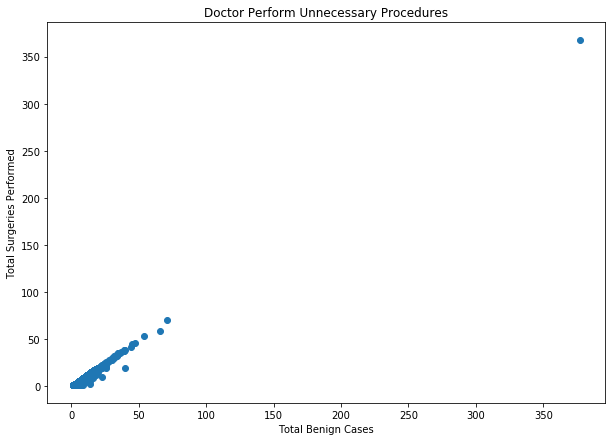

In [34]:
# plot
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures')

plt.scatter(doctor_rate['denominator'],doctor_rate['numerator'], label = 'doctors_performance_rate')
plt.xlabel('Total Benign Cases')
plt.ylabel('Total Surgeries Performed')

In [35]:
doctor_rate.denominator.max()

377

In [36]:
doctor_rate.numerator.max()

368.0

In [20]:
doctor_rate.loc[422]

doctor_id                        45975c1f8922df0bb6fb15cdbbfeb4dc802c7e17ccf56b...
numerator                                                                        1
denominator                                                                      1
rate_of_unneccarry_procedures                                                    1
Name: 422, dtype: object

In [18]:
doctor_rate.head()

,doctor_id,numerator,denominator,rate_of_unneccarry_procedures
0,0053f157450476af69c501f39e8780d7cea30aafbfb9a2...,6.0,8,0.75
1,006764cf23e7df5bf91511cf1c2c78903ee7c1683a936d...,1.0,1,1.00
2,0067c410b32482e2e46323b01a592300a87c9ae54b5ab4...,1.0,1,1.00
3,007a1afad99071d1f2cc5baeacaee818a604d689744e55...,12.0,12,1.00
4,00d2da293998cebb9a57036a2a914dbba4e96e4e272e6c...,1.0,1,1.00


In [37]:
df1 = doctor_rate.loc[doctor_rate["denominator"] <=40 ]


Text(0, 0.5, 'Total Surgeries Performed')

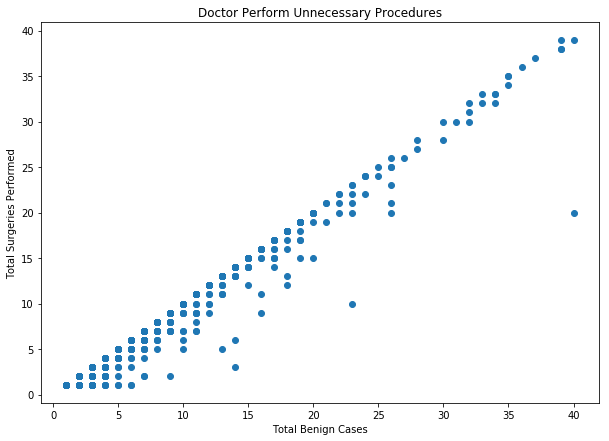

In [39]:
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures')

plt.scatter(df1['denominator'],df1['numerator'])
plt.xlabel('Total Benign Cases')
plt.ylabel('Total Surgeries Performed')

Text(0, 0.5, 'Percentage of Surgeries Performed')

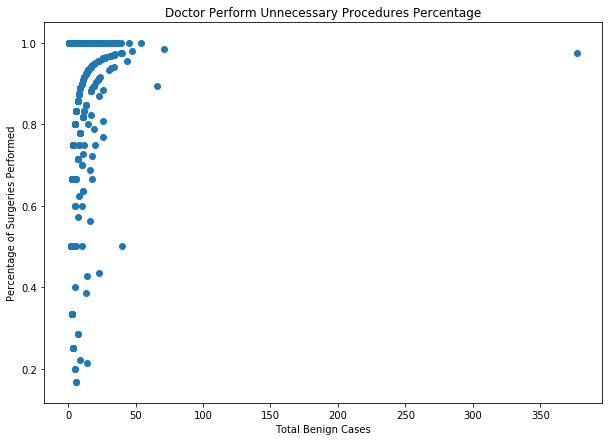

In [40]:
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures Percentage')

plt.scatter(doctor_rate['denominator'],doctor_rate['rate_of_unneccarry_procedures'])
plt.xlabel('Total Benign Cases')
plt.ylabel('Percentage of Surgeries Performed')

Text(0, 0.5, 'Percentage of Surgeries Performed')

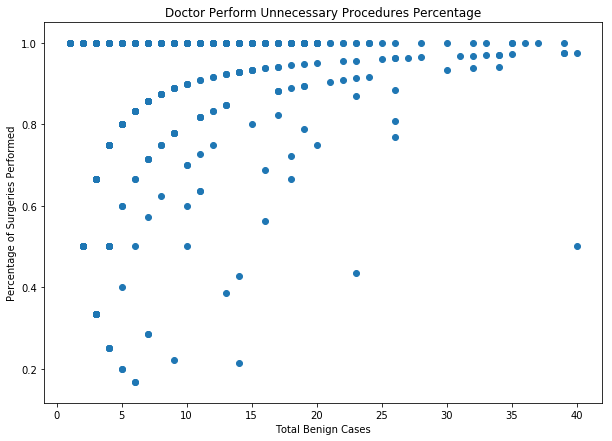

In [41]:
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures Percentage')

plt.scatter(df1['denominator'],df1['rate_of_unneccarry_procedures'])
plt.xlabel('Total Benign Cases')
plt.ylabel('Percentage of Surgeries Performed')